# Продажи компьютерных игр

В данном проекте мы проанализурем исторические данные о международных продажах компьютерных игр интернет-магазина «Стримчик».

**Цель проекта:** выявить закономерности, определяющие успешность игры.


**Ход исследования**

Исследование пройдёт в три этапа:

1. Предобработка данных

Мы изучим общую информацию о датасете и подготовим данные к дальнейшему анализу:

- Приведем названия столбцов к нижнему регистру;
- Преобразуем данные в нужные типы;
- Проверим наличие в данных пропусков, проанализируем полученные результаты и удалим, где возможно, пропущенные значения;

2. Исследовательский анализ данных

Мы изучим взаимосвязь основных параметров датасета, визуализируем данные и выявим факторы, которые влияют на популяность игр:

- Проанализируем, сколько игр выпускалось в разные годы;
- Изучим, как менялись продажи по платформам, установим среднюю продолжительность жизненного цикла игровой платформы и выберем потенциально прибыльные платформы;
- Проанализируем, как влияют на продажи игр отзывы пользователей и критиков;
- Выявим самые прибыльные жанры;
- Составим портрет пользователя каждого региона: установим самые популярые платформы и жанры, выясним, влияет ли возрастной рейтинг на продажи игр в каждом регионе.

3. Статистический анализ данных 

Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

В заключении подведем итоги и сделаем общие выводы о потенциально популярных продуктах на 2017 год.


## Предобработка данных

### Общая информация  датасете

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings; warnings.filterwarnings('ignore')

In [2]:
# Открываем файл
df = pd.read_csv('/datasets/games.csv') 

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Изучаем общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Проверяем, есть ли в данных пропущенные значения
df.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [6]:
# Посчитаем процент пропущенных значений для каждого столбца
pd.DataFrame(df.isna().mean().sort_values()*100).round(2).style.background_gradient('coolwarm')

,0
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Name,0.010000
Genre,0.010000
Year_of_Release,1.610000
User_Score,40.090000
Rating,40.480000


In [7]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [8]:
# Посмотрим, есть ли дубликаты
df.duplicated().sum()

0

В датасете 16715 строк и 11 столбцов. 

Шесть столбцов имеют тип данных float64, пять столбцов - тип данных object. 

В шести столбцах обнаружены пропущенные значения. В трёх из них доля пропусков не привышает 2%. В столбцах User_Score и Rating пропущено 40% значений. В Critic_Score - 51%.

### Подготовка данных

#### Приведение столбцов к нижему регистру

In [9]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Попуски

In [11]:
# Посмотрим на строки с пропусками в столбце 'name'
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих же строках пропущены значения в столбцах `genre`, `critic_score`, `user_score` и `rating`. Удаляем их без сожаления. Также удаляем 2% строк, где пропущены значения в столбце `year_of_release`: 

In [12]:
df = df.dropna(subset=['name','year_of_release'])

Мы удалили строки, где пропущено не более 2% значений в столбцах `name`, `genre` и `year_of_release`. Удаление такой малой доли данных не повлияет на результат. Данных для анализа осталось еще очень много.

Изучим пропуски в столбцах `user_score`, `rating` и `critic_score`.

In [13]:
df[df['critic_score'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [14]:
(
len
(df[
(df['user_score'].isna()) 
& (df['critic_score'].isna()) 
& (df['rating'].isna())])
)

6534

Пропущеные данные относятся к разным играм, разных лет и для разных платформ. Большая часть пропусков присутствует одновременно во всех трех столбцах. Это может быть связано с техническим сбоем или недоработкой сотрудника, ответственного за сбор этих данных.

B столбцах `user_score` и `rating` пропущено по 40%, а в `critic_score` 51%. Такой большой объем строк нельзя просто удалить, останется слишком мало даннных для анализа. Заменять их средними или медианными занчениями тоже неправильно - это сильно исказит данные.

Заменим пропуски в `user_score` и `critic_score` нулями, что соответствует числовому типу данных, а в `rating` - значением `unknown`, которое соотвествует строковому типу данных в столбце.

In [15]:
# Посмотрим на уникальные значения в столбце 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
1.5       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце `user_score` помимо `nan` есть еще значение `tbd`. TBD расшифровывается как "to be determined (decided)" - "будет определено (решено)". Здесь это может означать, что информации по рейтингу еще нет, рейтинг еще не подсчитан. В любом случае, информация отсутствует. Заменим эти значения нулями, как и пропуски.

In [17]:
# Заменяем 'tbd' на 0
df.loc[df['user_score'] == 'tbd', 'user_score'] = '0'

In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '0', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [19]:
df['user_score'].value_counts()

0      2377
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.3       2
1.5       2
0.2       2
0.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64

In [20]:
# Заменяем пропуски нулями
df['user_score'] = df['user_score'].fillna(0)

In [21]:
df['user_score'].value_counts()

0      6605
0      2377
7.8     322
8       285
8.2     276
       ... 
2.3       2
0.2       2
0.5       2
0.3       2
9.7       1
Name: user_score, Length: 96, dtype: int64

In [22]:
df['critic_score'] = df['critic_score'].fillna(0)

In [23]:
# Заменяем пропуски на 'unknown'
df['rating'] = df['rating'].fillna('unknown') 

In [24]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Итак, мы обработали все пропущенные значения. Удалили строки с не более 2% пропусков в столбцах `name` и `ear_of_release`, заменили нулями и значением `unknown` пропуски 40% значений в столбцах `user_score` и `rating` и 51%  в `critic_score`. В столбце `user_score` также заменили на нули значение `tbd`.

#### Обработка редких значений в столбце `rating`

In [25]:
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

In [26]:
df.loc[df['rating'] == 'RP', 'rating'] = 'unknown'

In [27]:
df = df[df['rating'] != 'K-A']

In [28]:
df = df[df['rating'] != 'AO']

In [29]:
df['rating'].value_counts()

unknown    6677
E          3921
T          2905
M          1536
E10+       1393
EC            8
Name: rating, dtype: int64

####  Преобразование типов данных

In [30]:
# Заменим года на целые числа
df['year_of_release'] = df['year_of_release'].astype(int) 

In [31]:
# Посморим, как выглядят значения в столбце 'user_score'
df['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '0', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Здесь логично заменить тип данных на `float`.

In [32]:
df['user_score'] = df['user_score'].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16440 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16440 non-null  object 
 1   platform         16440 non-null  object 
 2   year_of_release  16440 non-null  int64  
 3   genre            16440 non-null  object 
 4   na_sales         16440 non-null  float64
 5   eu_sales         16440 non-null  float64
 6   jp_sales         16440 non-null  float64
 7   other_sales      16440 non-null  float64
 8   critic_score     16440 non-null  float64
 9   user_score       16440 non-null  float64
 10  rating           16440 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Значение `RP`("Rating Pending" - "Рейтинг ожидается") можно объединить с `unknown`. Значение рейтинга `K-A` установить не удалось. Поскольку он встречается крайне редко, как и `AO` (18+). Удалим строки с этими рейтингами.

#### Создание столбца с суммарными продажами

In [34]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


#### Создание столбца семействами/производителям платформ

In [36]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [37]:
def platform_family (platform):
    if platform == 'PS'\
    or platform == 'PS2'\
    or platform == 'PS3'\
    or platform == 'PS4'\
    or platform == 'PSP'\
    or platform == 'PSV':
        return 'PlayStation'
    elif platform == 'Wii'\
    or platform == 'WiiU'\
    or platform =='GB'\
    or platform =='NES'\
    or platform == 'SNES'\
    or platform =='DS'\
    or platform =='3DS'\
    or platform =='N64'\
    or platform =='GC'\
    or platform =='NG':
        return 'Nintendo'
    elif platform =='X360'\
    or platform == 'XB'\
    or platform =='XOne':
        return 'XBox'
    elif platform =='PC':
        return 'PC'
    else:
        return 'Others'

In [38]:
df['platform_family'] = df['platform'].apply(platform_family)

**Данные подготовлены**

Мы выполнили предобрабртку данных. 

Изучили общую информацию о датасете. Привели названия столбцов к нижнему регистру. Проанализировали количество и процент пропусков. 

Пропуски в столбцах с оценками и рейтингом наиболее заметны. Их причиной может быть технический сбой, например, при объединении данных из разных источников, или человеческий фактор. Этих пропусков слишком много, чтобы заменить их на медианы или средние значения, поэтому мы заменили их на нули в `user_score` и `critic_score` и на значение `unknown` в `rating` в соотвествии с типами данных в столбцах.

В столбце `user_score` обнаружили значения `tbd` ("to be determined (decided)") и заменили их на нули, как и пропуски.

Удалили строки с небольшим количеством пропусков в столбцах `name`, `genre` и `year_of_release`, так как это не повлияет на результаты.

Изменили типы данных в соответствии с занчениями столбцов `year_of_release` на `int` и `user_score` на `float`.

Подсчитали суммарные продажи во всех регионах и поместили результаты в новый столбец `total_sales`. Категоризировали значения столбца `platform` по семействами/производителям платформ и поместили их в столбец `platform_family`.

Теперь можно переходить к исследовательскому анализу.

## Исследовательский анализ данных

### Количество игр, выпущеннх в разные годы

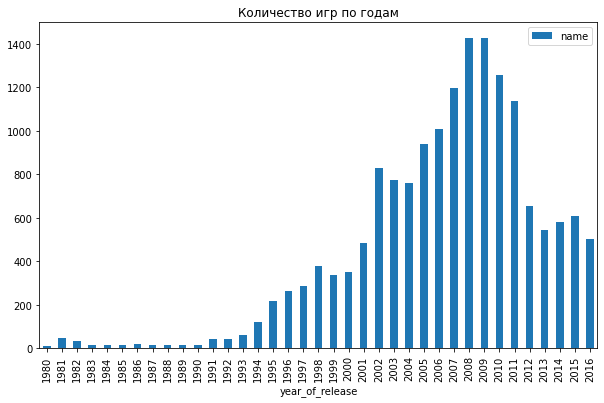

In [39]:
(df
 .pivot_table
 (index = 'year_of_release', 
  values ='name',
  aggfunc = 'count')
 .plot(kind = 'bar',
       figsize = (10,6),
       title = 'Количество игр по годам'));

До начала 90-х игр выпускалось очень мало. Начиная с 1993 года количество выпускаемых игр стало расти. Больше всего игр было выпущено в 2008 и 2009 годах. После 2009 года число ежегодно выпускаемых игр пошло на спад.

### Изменение продаж по платформам

In [40]:
# Создаем новую переменную и сохраняем в нее сгруппированные по плаформам данные о суммарных продажах
platform_sales = df.groupby('platform').agg(total_sales = ('total_sales', 'sum'))

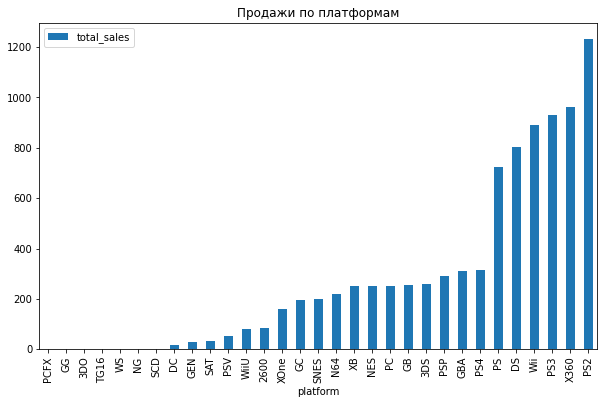

In [41]:
# Строим столбчатый график
(platform_sales
 .sort_values(by ='total_sales')
 .plot(kind = 'bar',
       figsize = (10,6), 
       title = 'Продажи по платформам'));

На графике видно, что с большим отрывом лидируют 6 платформ: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. Безусловный лидер среди них - `PS2`.

Также на графике можно увидеть, что продажи игр для ряда платформ: `PCFX`, `3DO`, `TG16`, `WS`,	`NG`, практически равны нулю. 	

In [42]:
# Выведем данные об общих продажах шести самых прибыльных платформ в виде таблицы
platform_sales.sort_values(by = 'total_sales', ascending = False).head(6)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,725.67


In [43]:
# Посчитаем долю каждой платформы от общих продаж
platform_sales['ratio'] = platform_sales['total_sales']/platform_sales['total_sales'].sum()
platform_sales['per_cent'] = (platform_sales['ratio']*100).round().astype(int)

In [44]:
platform_sales.sort_values(by = 'total_sales', ascending = False).head(6)

,total_sales,ratio,per_cent
platform,,,
PS2,1233.56,0.140049,14
X360,961.24,0.109131,11
PS3,931.34,0.105737,11
Wii,891.18,0.101177,10
DS,802.78,0.091141,9
PS,725.67,0.082387,8


Суммарно доля продаж на этих платформах составляет *63%* от общих продаж.

In [45]:
# Выведем данные шести наименее прибыльных платформ:
platform_sales.sort_values(by = 'total_sales').head(6)

,total_sales,ratio,per_cent
platform,,,
PCFX,0.03,0.000003,0
GG,0.04,0.000005,0
3DO,0.10,0.000011,0
TG16,0.16,0.000018,0
WS,1.42,0.000161,0
NG,1.44,0.000163,0


Доля продаж этих платформ составляет менее *1%* от общих продаж.

#### Распределение по годам для платформ с наибольшими суммарными продажами

In [46]:
# Сгруппируем данные о суммарных продажах на каждой платформе по годам
years_platform_sales = \
df.pivot_table\
(index = 'year_of_release',\
columns = 'platform',\
values ='total_sales',\
aggfunc = 'sum')

In [47]:
years_platform_sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим графики распределения продаж по годам для каждой из шести самых прибыльных платформ:

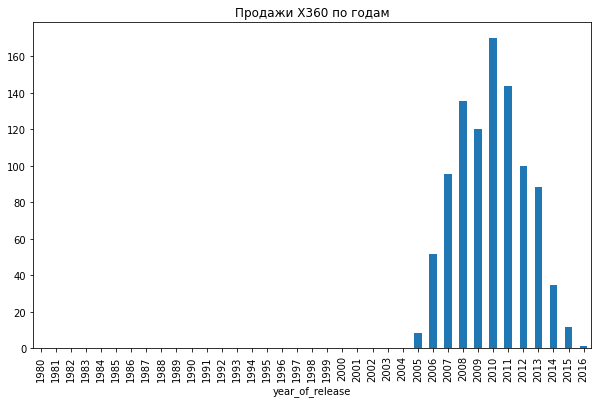

In [48]:
years_platform_sales['X360'].plot(kind = 'bar', figsize = (10,6), title = 'Продажи X360 по годам');

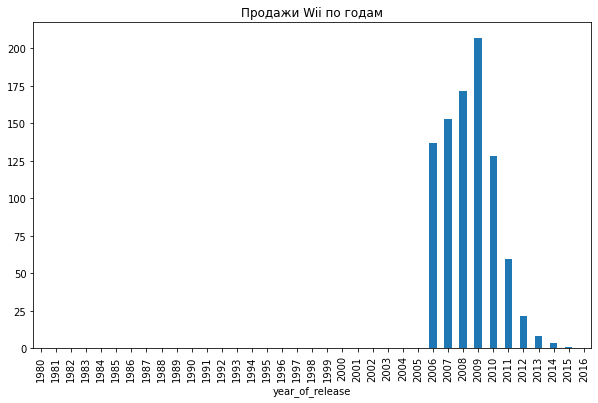

In [49]:
years_platform_sales['Wii'].plot(kind = 'bar', figsize = (10,6), title = 'Продажи Wii по годам');

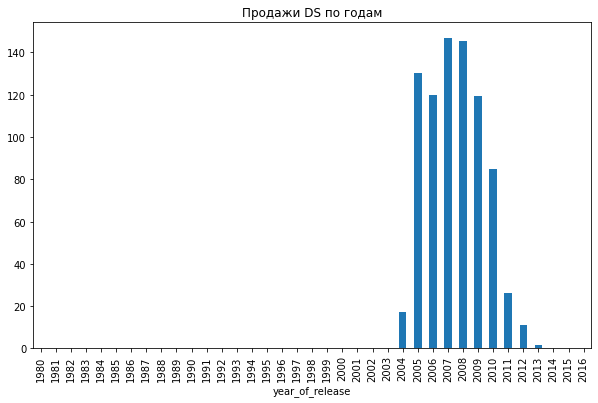

In [50]:
years_platform_sales['DS'].plot(kind = 'bar', figsize = (10,6), title = 'Продажи DS по годам');

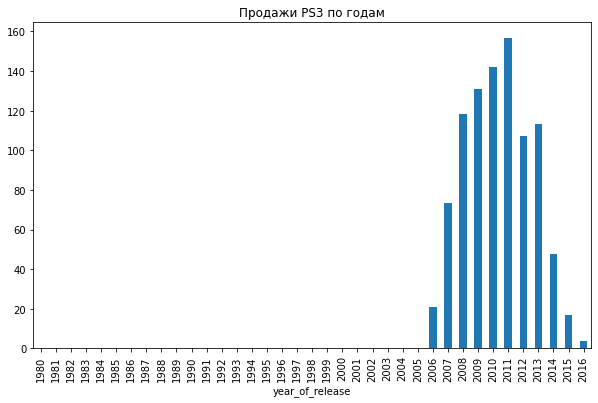

In [51]:
years_platform_sales['PS3'].plot(kind = 'bar', figsize = (10,6), title = 'Продажи PS3 по годам');

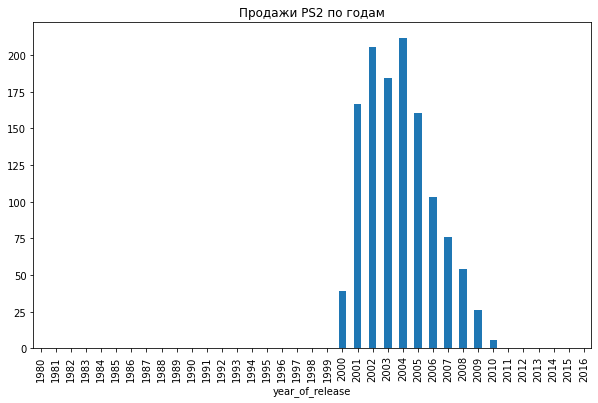

In [52]:
years_platform_sales['PS2'].plot(kind = 'bar', figsize = (10,6), title = 'Продажи PS2 по годам');

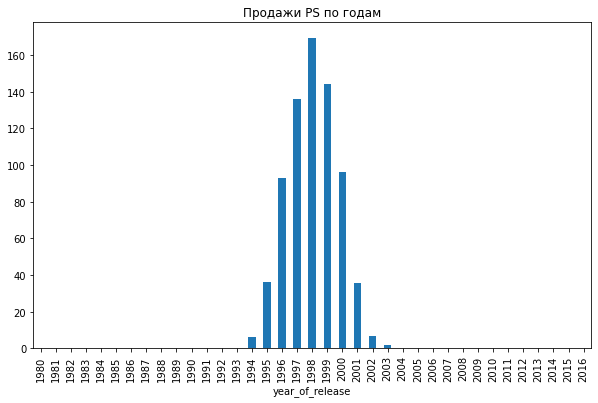

In [53]:
years_platform_sales['PS'].plot(kind = 'bar', figsize = (10,6), title = 'Продажи PS по годам');

#### Жизненный цикл платформ

Как видно из графиков жизненный цикл самых прибыльных платформ составляет *10-12 лет*. 

Причем пики продаж приходятся на игры, выпущенные на *4-й - 6-й годы* после появления платформы. 

Новые версии приставок выпускаются каждые 5 - 6 лет.

Так, например, приставка `PlayStation (PS)` вышла в конце 1994 года в Японии и осенью 1995 в США и Европе. Пик продаж приходится на игры 1998 года выпуска. 

Следующая версия этой приставки - `PlayStation 2(PS2)` - вышла в 2000 г. С 2001 года продажи новых игр для PS резко пошли на спад. А у самой `PS2` пики продаж приходятся на игры 2002 и 2004 гг. выпуска. После этого продажи шли вниз.

`PS3` вышла в 2006-2007 гг. Пик приходится на игры 2011 г.

#### Выбор актуального периода для исследования

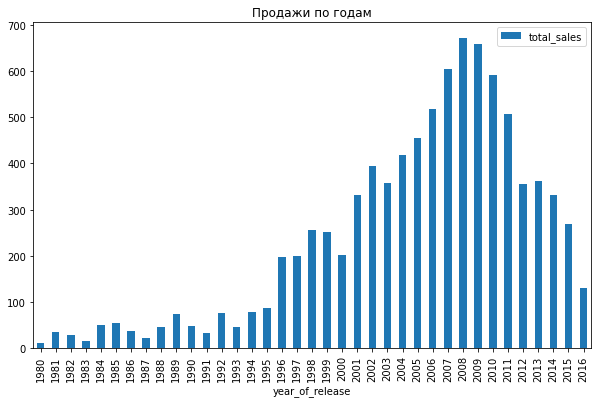

In [54]:
# Сгруппируем данные об общих продажах по годам и построим график
(df.groupby('year_of_release')
 .agg(total_sales = ('total_sales', 'sum'))
 .plot(kind = 'bar',
       figsize = (10,6), 
       title = 'Продажи по годам'));

Из графика видно, что резкий рост продаж начинается с 1996 года. Это в целом соотносится с ростом количества выпускаемых игр после 1993 года. 

А если учесть жизненный цикл платформ, можно смело отбросить 80-е и 90-е.

А с учетом быстро меняющихся трендов и коротких периодов от появления до пика продаж по платформам можно отбросить и 2000-2010 гг. 

Для прогнозирования продаж необходимо выбрать платформы, которые имеют потенциал роста. Поскольку рост продаж на платформах прекращается через 4-6 лет после выхода, нужно ориентироваться на платформы, которые появились не позднее 4 лет назад.

Также мы наблюдаем резкий спад продаж в 2016. Причиной этого может быть то, что год еще не закончился и  данные могут быть неполными.
 
В целом можно сделать вывод, что *актуальный период для анализа: с 2014 по 2016 гг*.

In [55]:
# Сохраним данные по актуальному периоду в новую переменную
df_relevant = df[(df['year_of_release'] > 2013)]

In [56]:
# Создадим таблицу с данными о продажах по платформам для актуального периода 
platform_sales_relevant =\
df_relevant\
.groupby('platform')\
.agg(total_sales = ('total_sales', 'sum'))

In [57]:
platform_sales_relevant['ratio'] =\
platform_sales_relevant['total_sales']/platform_sales_relevant['total_sales'].sum()
platform_sales_relevant['per_cent'] = (platform_sales_relevant['ratio']*100).round().astype(int)

In [58]:
# Посмотрим на данные для шести самых прибыльных платформ
platform_sales_relevant.sort_values(by = 'total_sales', ascending = False).head()

,total_sales,ratio,per_cent
platform,,,
PS4,288.15,0.395024,40
XOne,140.36,0.192419,19
3DS,86.68,0.118829,12
PS3,68.18,0.093468,9
X360,48.22,0.066105,7


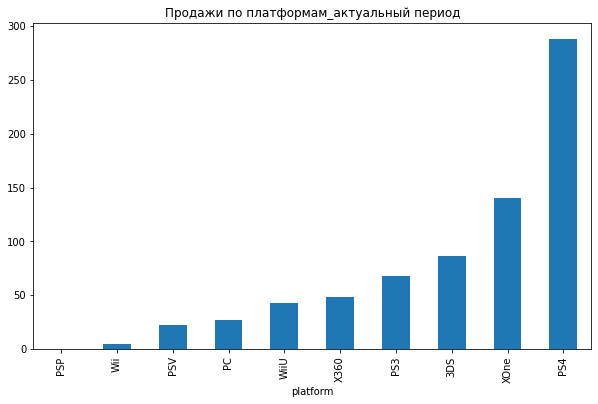

In [59]:
# Построим график
(platform_sales_relevant['total_sales']
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6), 
       title = 'Продажи по платформам_актуальный период'));

Список лидеров сильно изменился, теперь с большим отрывом опережает всех `PS4`, занимая 40% рынка. Далее идут `XOne`, `3DS`, `PS3` и `X360`. 

Исчезла `PS2`, жизненный цикл которой закончился в начале 2010 г. И `PS`, игры для которой перестали выпускать еще в 2000-х.

А на смену `DS` пришла `3DS`.

#### График «ящик с усами» для  продаж по платформам

In [60]:
# Сохраним список топ-платформ в переменную
top_platforms = platform_sales_relevant.sort_values(by = 'total_sales', ascending = False).head().index.values

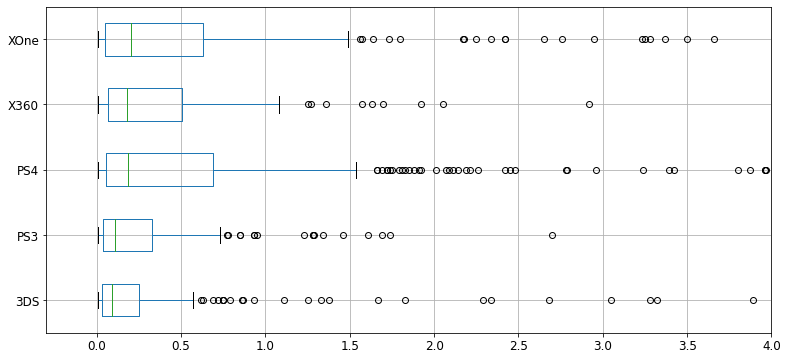

In [61]:
# Построим "ящик с усами" для продаж по топ-платформам 
(df_relevant[df_relevant['platform'].isin(top_platforms)]
 .pivot_table(index = 'name', columns = 'platform', values = 'total_sales')
 .plot.box(vert = False, fontsize = 12, figsize = (13,6), xlim = (-0.3,4), grid = True));

In [62]:
(df_relevant[df_relevant['platform'].isin(top_platforms)]
 .pivot_table(index = 'name', columns = 'platform', values = 'total_sales')
 .describe())

platform,3DS,PS3,PS4,X360,XOne
count,212.000000,219.000000,376.000000,111.000000,228.000000
mean,0.408868,0.311324,0.766356,0.434414,0.615614
std,1.188368,0.633059,1.614969,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.040000,0.057500,0.070000,0.050000
50%,0.090000,0.110000,0.185000,0.180000,0.205000
75%,0.250000,0.325000,0.690000,0.505000,0.632500
max,11.680000,5.270000,14.630000,4.280000,7.390000


Из графика видно, что для всех топ-платформ продажи, превышающие 1.5 млн копий - это выбросы. У большинства платформ - выбросы начинаются с еще меньших значений. 

Медиана у `PS4`находится на уровне 0.19, а у `XOne` - на 0.2. Таким образом по медианным продажам с небольшим отрывом лидирует `XOne`. `X360` на третьем месте с медианой 0.18

Третий квартиль у `PS4`- на уровне 0.69, а у `XOne` - 0.63. 

#### Потенциально прибыльные платформы

In [63]:
# Посмотрим на распределение продаж по платформам и по годам для актуального периода
years_platform_sales_relevant = \
df_relevant\
.pivot_table\
(index = 'year_of_release',\
columns = 'platform',\
values ='total_sales',\
aggfunc = 'sum')

In [64]:
years_platform_sales_relevant

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


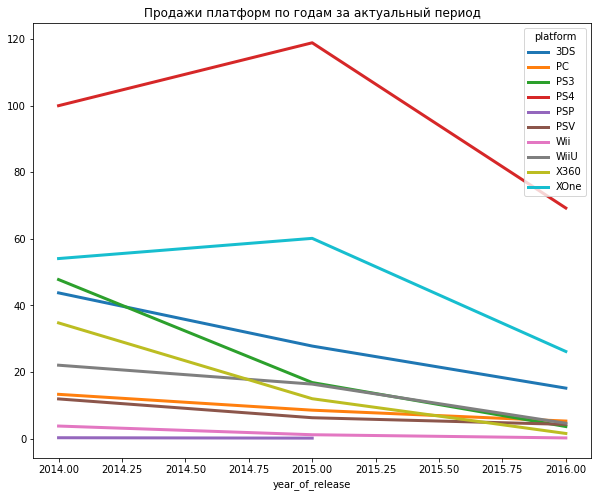

In [65]:
# Построим график
(years_platform_sales_relevant
 .plot(figsize = (10,8), 
       linewidth = 3,
       title = 'Продажи платформ по годам за актуальный период'));

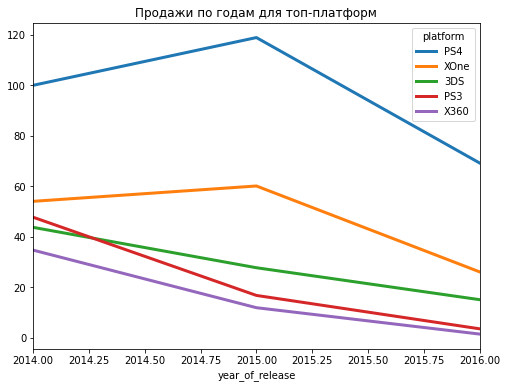

In [66]:
# Посмотрим на продажи по годам для топ-платформ
(years_platform_sales_relevant[['PS4', 'XOne', '3DS', 'PS3', 'X360']]
 .plot(xlim = (2014, 2016), 
       figsize = (8,6), 
       linewidth = 3,
       title = 'Продажи по годам для топ-платформ'));

График показывает, что продажи падают. Но мы знаем, что данные за 2016 г. неполные. Исключим их.

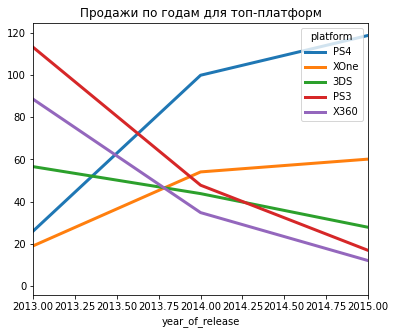

In [67]:
# Посмотрим на продажи c 2013 года и без 2016 для топ-платформ
(df[df['year_of_release'] > 2012]
    .pivot_table
    (index = 'year_of_release',
     columns = 'platform',
     values ='total_sales',
     aggfunc = 'sum')
    [['PS4', 'XOne', '3DS', 'PS3', 'X360']]
    .plot(xlim = (2013, 2015), 
          figsize = (6,5), 
          linewidth = 3,
          title = 'Продажи по годам для топ-платформ'));

Если не принимать в расчет данные за 2016 год, которые, скорее всего, являются неполными, то на графике отчетливо видно, что только у двух платформ продажи продолжают расти - это `PS4` и `XOne`.

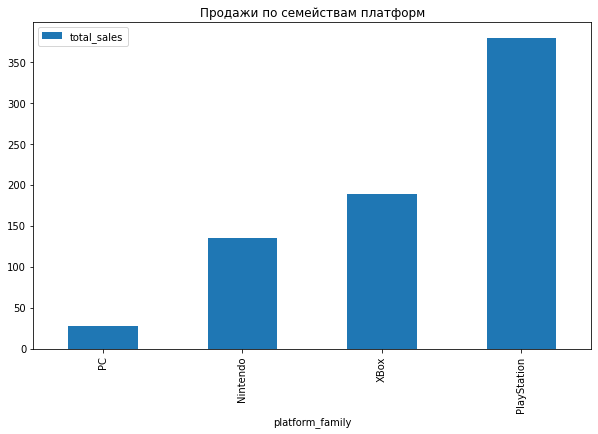

In [68]:
# Построим график суммарных продаж по семействам платформ
(df_relevant.groupby('platform_family').agg(total_sales = ('total_sales', 'sum'))
 .sort_values(by = 'total_sales')
 .plot(kind = 'bar',
       figsize = (10,6), 
       title = 'Продажи по семействам платформ'));

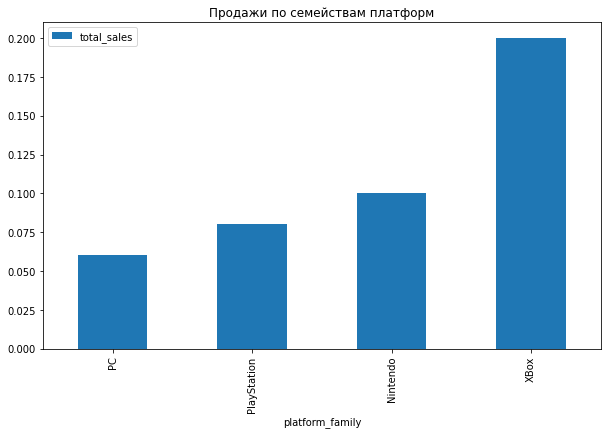

In [69]:
# Построим график медианных продаж по семействам платформ
(df_relevant.groupby('platform_family').agg(total_sales = ('total_sales', 'median'))
 .sort_values(by = 'total_sales')
 .plot(kind = 'bar',
       figsize = (10,6), 
       title = 'Продажи по семействам платформ'));

В суммарных продажах лидирует семейство `PlayStation`. А в медианных - `XBox`.

**Вывод**

Определив актуальный период для иссдедования и проанализировав данные о глобальных продажах игр по платформам, мы выявили, что по суммарных продажам лидером являются приставки `PlayStation`. А если судить по медианным продажам - `XBox`.

В актуальном периоде по суммарным продажам с большим отрывом лидирует `PS4`, занимая 40% рынка. Далее идут `XOne`, `3DS`, `PS3` и `X360`.

Однако из графика "ящик с усами" видно, что большие цифры суммарных продаж являются выбросами. 

По медианным продажам `PS4`немного уступает `XOne`. А `X360` - на третьем месте.
 
Из графика распределения продаж по годам можно сделать вывод, что `PS4` и `XOne` имеют потенциал роста.

### Влияние отзывов пользователей и критиков на продажи

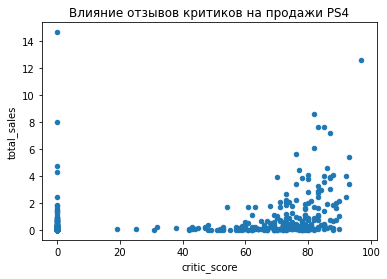

In [70]:
# Посмотрим как влияют отзывы критиков на продажи внутри платформы PS4
(df[df['platform'] == 'PS4']
.plot(x='critic_score', 
      y='total_sales', 
      kind='scatter', 
      title = 'Влияние отзывов критиков на продажи PS4')); 

In [71]:
# Посчитаем корреляцию
(df[df['platform'] == 'PS4']['total_sales']
.corr(df[df['platform'] == 'PS4']['critic_score']))

0.2275496062775265

График и значение коэффициента корреляции Пирсона показывают, что взаимосвязь между отзывами критиков и продажами очень слабая.

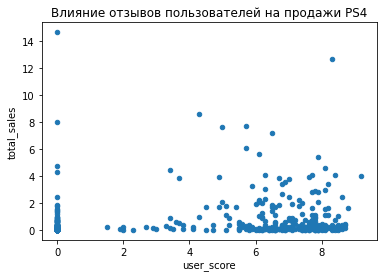

In [72]:
# Посмотрим как влияют отзывы пользователей на продажи внутри платформы PS4
(df[df['platform'] == 'PS4']
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter',
       title = 'Влияние отзывов пользователей на продажи PS4')); 

In [73]:
# Посчитаем корреляцию
(df[df['platform'] == 'PS4']['total_sales']
.corr(df[df['platform'] == 'PS4']['user_score']))

0.11311562450852881

Оценки пользователей влияли на продажи `PS4` еще меньше.

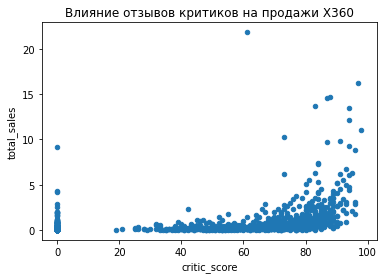

In [74]:
# Посмотрим как влияют отзывы критиков на продажи внутри платформы X360
(df[df['platform'] == 'X360']
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов критиков на продажи X360')); 

In [75]:
# Посчитаем корреляцию:
(df[df['platform'] == 'X360']['total_sales']
.corr(df[df['platform'] == 'X360']['critic_score']))

0.3117562516201688

И здесь аналогичная ситуация.

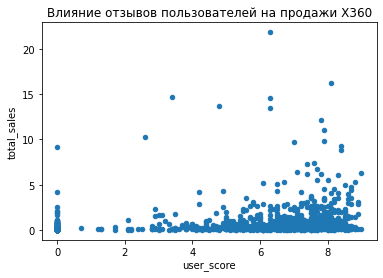

In [76]:
# Посмотрим как влияют отзывы пользователей на продажи внутри платформы X360
(df[df['platform'] == 'X360']
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов пользователей на продажи X360')); 

In [77]:
# Посчитаем корреляцию
(df[df['platform'] == 'X360']['total_sales']
.corr(df[df['platform'] == 'X360']['user_score']))

0.20780580062906842

Отзывы пользователей также мало влияют на продажи.

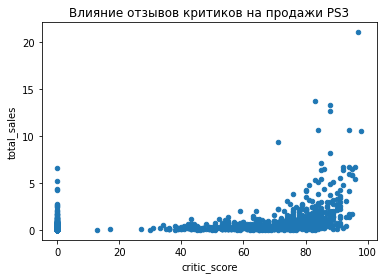

In [78]:
# Посмотрим как влияют отзывы критиков на продажи внутри платформы PS3
(df[df['platform'] == 'PS3']
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов критиков на продажи PS3')); 

In [79]:
# Посчитаем корреляцию
(df[df['platform'] == 'PS3']['total_sales']
 .corr(df[df['platform'] == 'PS3']['critic_score']))

0.35514556594230773

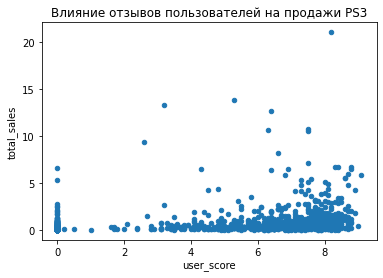

In [80]:
# Посмотрим как влияют отзывы пользователей на продажи внутри платформы PS3
(df[df['platform'] == 'PS3']
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов пользователей на продажи PS3')); 

In [81]:
# Посчитаем корреляцию
(df[df['platform'] == 'PS3']['total_sales']
 .corr(df[df['platform'] == 'PS3']['user_score']))

0.2745827060165664

И здесь взаимосвясь между оценкой пользователей и критиков и продажами очень слабая.

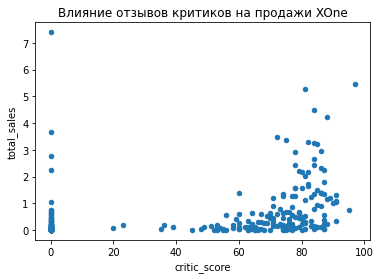

In [82]:
# Посмотрим как влияют отзывы критиков на продажи внутри платформы XOne
(df[df['platform'] == 'XOne']
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов критиков на продажи XOne')); 

In [83]:
# Посчитаем корреляцию
(df[df['platform'] == 'XOne']['total_sales']
 .corr(df[df['platform'] == 'XOne']['critic_score']))

0.2748391874944539

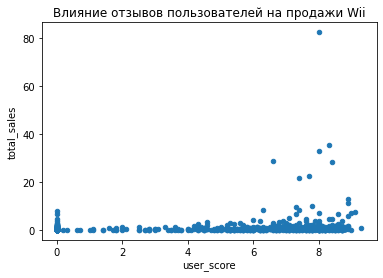

In [84]:
# Посмотрим как влияют отзывы пользователей на продажи внутри платформы Wii
(df[df['platform'] == 'Wii']
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов пользователей на продажи Wii')); 

In [85]:
# Посчитаем корреляцию
(df[df['platform'] == 'XOne']['total_sales']
 .corr(df[df['platform'] == 'XOne']['user_score']))

0.11656261405851895

Здесь корреляция еще меньшне.

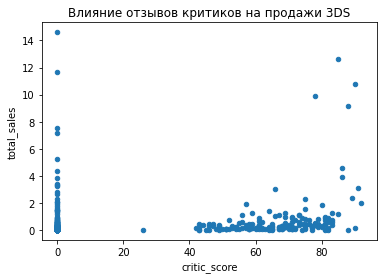

In [86]:
# Посмотрим как влияют отзывы критиков на продажи внутри платформы DS
(df[df['platform'] == '3DS']
 .plot(x='critic_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов критиков на продажи 3DS')); 

In [87]:
# Посчитаем корреляцию
(df[df['platform'] == '3DS']['total_sales']
 .corr(df[df['platform'] == '3DS']['critic_score']))

0.16702057976149198

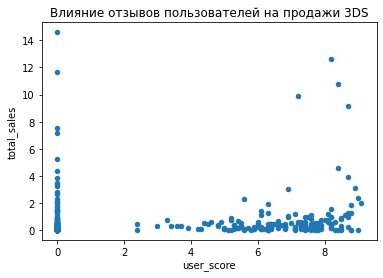

In [88]:
# Посмотрим как влияют отзывы пользователей на продажи внутри платформы DS
(df[df['platform'] == '3DS']
 .plot(x='user_score', 
       y='total_sales', 
       kind='scatter', 
       title = 'Влияние отзывов пользователей на продажи 3DS')); 

In [89]:
# Посчитаем корреляцию
(df[df['platform'] == '3DS']['total_sales']
 .corr(df[df['platform'] == '3DS']['user_score']))

0.1500533936060986

Итак, мы установили, что оценки критиков и пользователей не влияют на продажи самых популярных  платформ.

### Влияние жанров игр на продажи

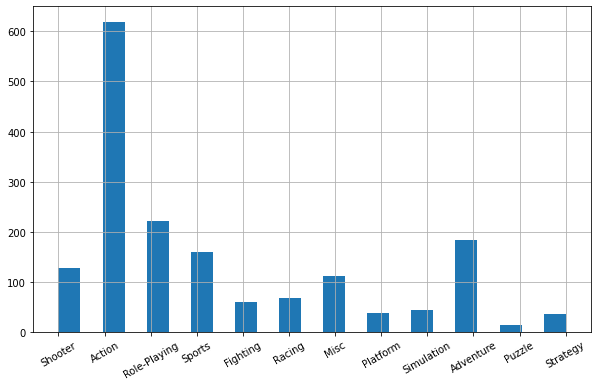

In [90]:
# Посмотрим на распределение игр по жанрам
df_relevant['genre'].hist(bins = 23, grid = True, figsize = (10, 6), xrot = 30);

Больше всего игр в жанре `Action`, меньше всего - в жанре `Puzzle`.

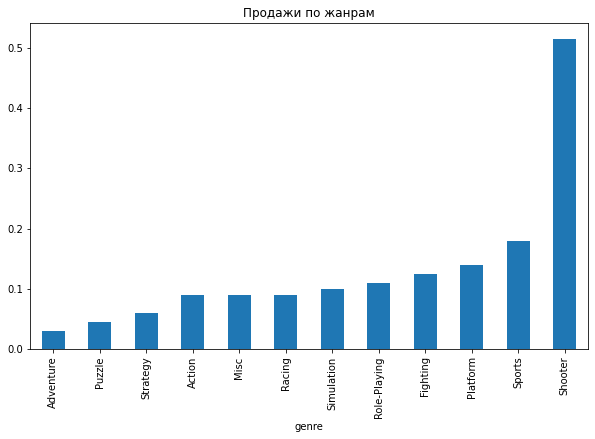

In [91]:
# Посмотрим на продажи по жанрам
(df_relevant.groupby('genre')['total_sales']
 .median()
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6), 
       title = 'Продажи по жанрам'));

Вопреки ожиданиям по медианным продажам лидирует жанр `Shooter`. Далее следуют `Sports`, `Platform`, `Fighting`  и `Role-Playing`. А  жанр `Action` лишь на 9-ом месте. Меньше всего продается игр в жанрах `Adventure`, `Puzzle,` и `Strategy`.

### Портрет пользователя каждого региона

#### Северная Америка

##### Самые популярные платформы (топ-5)

In [92]:
# Создадим таблицу с данными о продажах по платформам для актуального периода в Северной Америке: 
platform_na_sales_relevant =\
df_relevant\
.groupby('platform')\
.agg(na_sales = ('na_sales', 'sum'))

In [93]:
platform_na_sales_relevant['ratio'] =\
platform_na_sales_relevant['na_sales']/platform_na_sales_relevant ['na_sales'].sum()
platform_na_sales_relevant['per_cent'] = (platform_na_sales_relevant ['ratio']*100).round().astype(int)

In [94]:
platform_na_sales_relevant.sort_values(by = 'na_sales', ascending = False).head()

,na_sales,ratio,per_cent
platform,,,
PS4,98.61,0.347145,35
XOne,81.27,0.286102,29
X360,28.30,0.099627,10
3DS,22.64,0.079701,8
PS3,22.05,0.077624,8


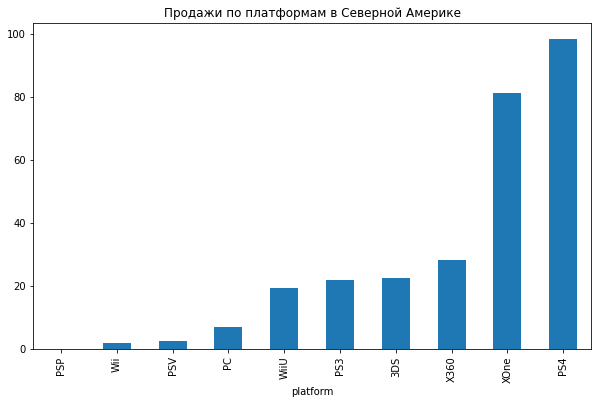

In [95]:
# Построим график продаж по платформам в Северной Америке:
(platform_na_sales_relevant['na_sales']
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6), 
       title = 'Продажи по платформам в Северной Америке'));

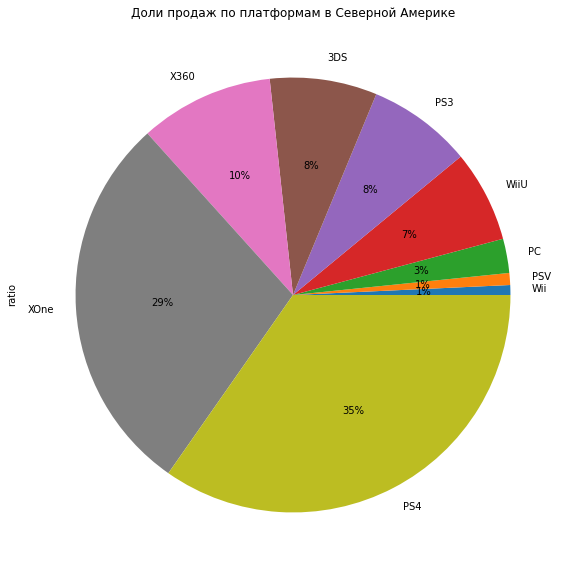

In [96]:
# Посмотрим на различия в процентах от продаж на круговой диаграмме:
(platform_na_sales_relevant[platform_na_sales_relevant['per_cent'] != 0]['ratio']
 .sort_values()
 .plot(kind = 'pie', 
      normalize=False, 
      autopct = '%.0f%%', 
      fontsize = 10,
      figsize = (10,10),
      title = 'Доли продаж по платформам в Северной Америке'));

Пятерка лидеров такая же как и в глобальных продажах, но места и доли распределились немного иначе. `PS4` также лидирует занимая 35% рынка. Далее идет `XOne` с 29%. Если в мире на третьем месте `3DS`, то в Северной Америке - `X360`. 

##### Самые популярные жанры (топ-5)

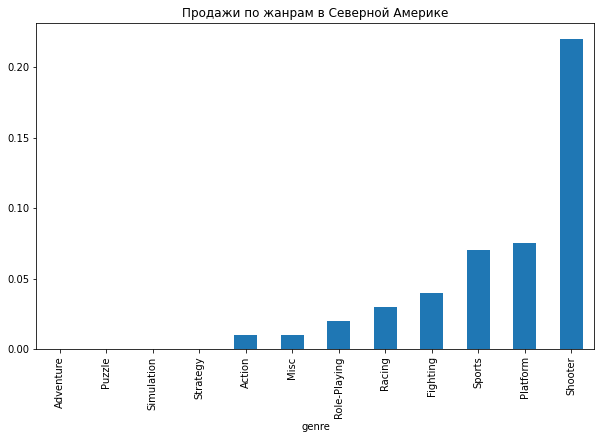

In [97]:
# Посмотрим на продажи по жанрам в Северной Америке:
(df_relevant
.groupby('genre')['na_sales']
.median()
.sort_values()
.plot(kind = 'bar', 
figsize = (10,6),
title = 'Продажи по жанрам в Северной Америке'));

В Северной Америке как и в мире лидирует жанр `Shooter`. `Platform` и `Sports` поменялись местами, `Fighting` -на четвертом, а вместо `Role-Playing` - `Racing`.
Какой же американец не любит быстрой езды!

##### Влияние ли рейтинга ESRB на продажи

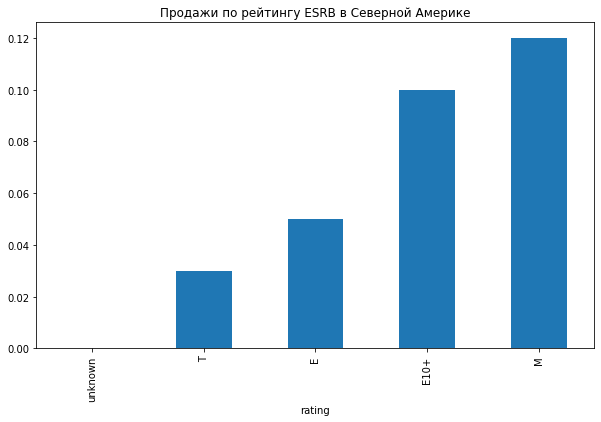

In [98]:
# Посмотрим влияет ли рейтинг ESRB на продажи в Северной Америке:
(df_relevant
.groupby('rating')['na_sales']
.median()
.sort_values()
.plot(kind = 'bar', 
figsize = (10,6),
title = 'Продажи по рейтингу ESRB в Северной Америке'));

Лучше всего в Америке продаются игры с рейтингами `M` ("Mature") для взрослых 17+, на втором месте игры для детей от 10 лет, на третьем - игры "Для всех" - рейтинг `E` ("Everyone"), далее - игры и `T` ("Teen") для подростков.

**Вывод**

Итак портрет североамериканского пользователя в целом мало чем отличается от портрета глобального пользователя. 

Американцы предпочитают те почти те же жанры и те же платформы. 

Значительное влияние на предпочтения пользователей оказывает рейтинг игр. Американцы предпочитают игры с рейтингами `M` ("Mature") для взрослых 17+, на втором месте игры с неизвестным рейтингом, на третьем - игры "Для всех" - рейтинг `E` ("Everyone").

#### Европа 

##### Самые популярные платформы (топ-5)

In [99]:
# Создадим таблицу с данными о продажах по платформам для актуального периода в Европе: 
platform_eu_sales_relevant =\
df_relevant\
.groupby('platform')\
.agg(eu_sales = ('eu_sales', 'sum'))

In [100]:
platform_eu_sales_relevant['ratio'] =\
platform_eu_sales_relevant['eu_sales']/platform_eu_sales_relevant ['eu_sales'].sum()
platform_eu_sales_relevant['per_cent'] = (platform_eu_sales_relevant ['ratio']*100).round().astype(int)

In [101]:
platform_eu_sales_relevant.sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales,ratio,per_cent
platform,,,
PS4,130.04,0.480420,48
XOne,46.25,0.170866,17
PS3,25.54,0.094355,9
PC,17.97,0.066388,7
3DS,16.12,0.059554,6


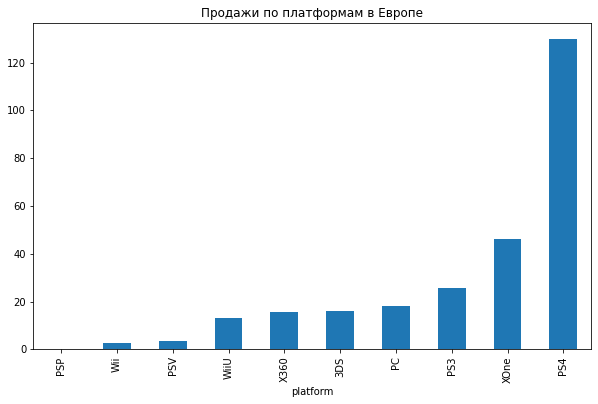

In [102]:
# Построим график продаж в Европе по платформам
(platform_eu_sales_relevant['eu_sales']
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6), 
       title = 'Продажи по платформам в Европе'));

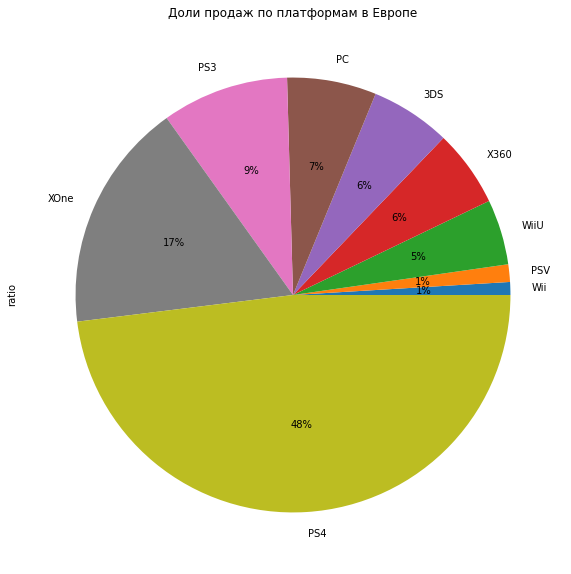

In [103]:
# Посмотрим на различия в процентах от продаж на круговой диаграмме
(platform_eu_sales_relevant[platform_eu_sales_relevant['per_cent'] != 0]['ratio']
 .sort_values()
 .plot(kind = 'pie', 
       normalize=False, 
       autopct = '%.0f%%', 
       fontsize = 10,  
       figsize = (10,10),      
       title = 'Доли продаж по платформам в Европе'));

И здесь безусловный лидер `PS4`, занимающая 48% рынка. `PS3` - на третьем месте, `3DS` - на пятом. `X360` выбыла из лидеров. А на четвертом месте в Европе `PC`. 

##### Самые популярные жанры (топ-5)

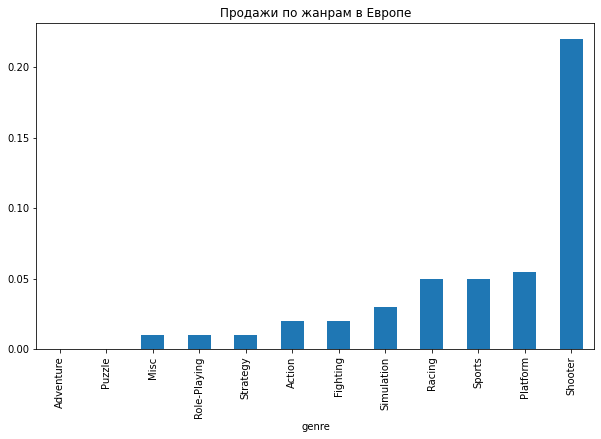

In [104]:
# Посмотрим на продажи по жанрам в Европе
(df_relevant
 .groupby('genre')['eu_sales']
 .median()
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6),
       title = 'Продажи по жанрам в Европе'));

И здесь с большим отрывом лидирует `Shooter`. Далее следуют  `Platform`, `Sports`, `Racing` и `Simulation`. 

##### Влияние ли рейтинга ESRB на продажи

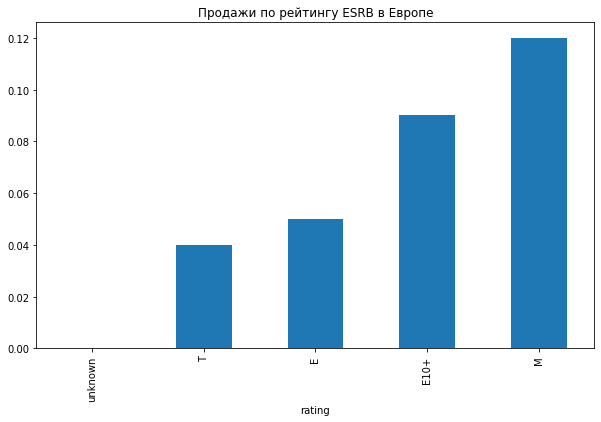

In [105]:
# Посмотрим влияет ли рейтинг ESRB на продажи в Европе
(df_relevant
 .groupby('rating')['eu_sales']
 .median()
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6),
       title = 'Продажи по рейтингу ESRB в Европе'));

В Европе рейтинги распределились также, как и в Америке.

**Вывод**

В целом предпочтения европейцев схожи с американскими, но из топ-платфрм исчезла `X360`, но появилась `PC`. А из топ-жанров пропал `Fighting`, но возник `Simulation`.

#### Япония

##### Самые популярные платформы (топ-5)

In [106]:
# Создадим таблицу с данными о продажах по платформам для актуального периода в Японии
platform_jp_sales_relevant =\
df_relevant\
.groupby('platform')\
.agg(jp_sales = ('jp_sales', 'sum'))

In [107]:
platform_jp_sales_relevant['ratio'] =\
platform_jp_sales_relevant['jp_sales']/platform_jp_sales_relevant ['jp_sales'].sum()
platform_jp_sales_relevant['per_cent'] = (platform_jp_sales_relevant ['ratio']*100).round().astype(int)

In [108]:
platform_jp_sales_relevant.sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales,ratio,per_cent
platform,,,
3DS,44.24,0.475239,48
PS4,15.02,0.161349,16
PSV,14.54,0.156193,16
PS3,11.22,0.120529,12
WiiU,7.31,0.078526,8


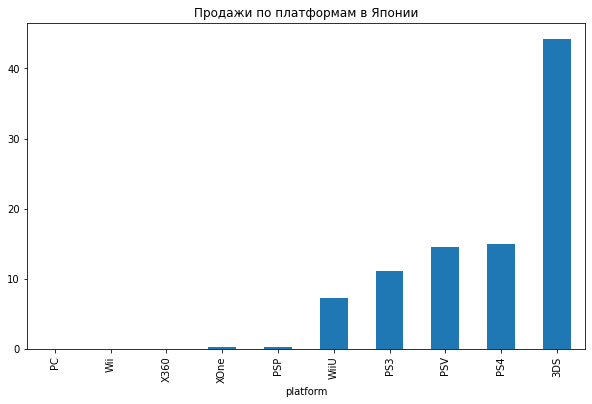

In [109]:
# Построим график продаж в Японии по платформам
(platform_jp_sales_relevant['jp_sales']
.sort_values()
.plot(kind = 'bar', 
figsize = (10,6), 
title = 'Продажи по платформам в Японии'));

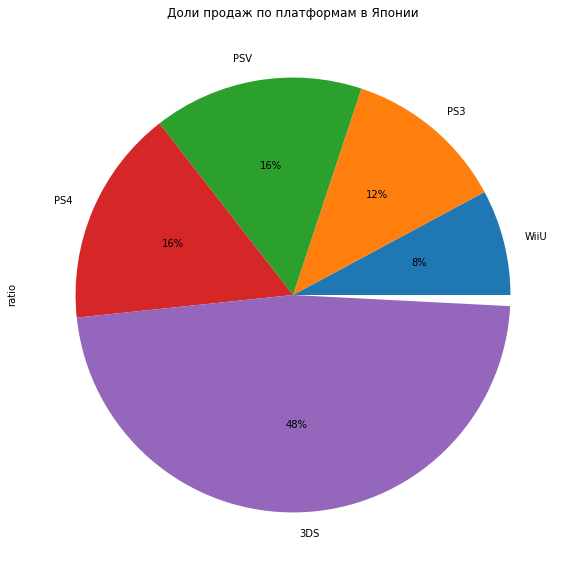

In [110]:
# Посмотрим на различия в процентах от продаж на круговой диаграмме
(platform_jp_sales_relevant[platform_jp_sales_relevant['per_cent'] != 0]['ratio']
 .sort_values()
 .plot(kind = 'pie', 
       normalize=False, 
       autopct = '%.0f%%', 
       fontsize = 10,  
       figsize = (10,10),      
       title = 'Доли продаж по платформам в Японии'));

Предпочтения японских пользователей сильно отличаются от глобальных и западных. Японцы любят портативные платформы и своих отечественных производителей. 

На первом месте c огромным отрывом здесь `3DS` от `Nintendo`, которая в мире занимает лишь третье, в Америке - четвертое, а в Европе пятое место. На третьем месте еще одна портативная приставка на это раз от `PlayStation` - `PSV`, а на пятом `WiiU` которых нет в топе на других рынках.

`PS2` и `PS3` на втором и четвертом соответственно.

А приставок американской `XBox` вообще нет!

##### Самые популярные жанры (топ-5)

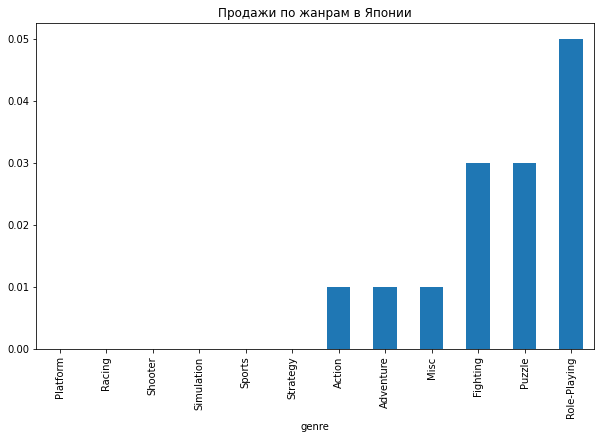

In [111]:
# Посмотрим на продажи по жанрам в Японии:
(df_relevant
 .groupby('genre')['jp_sales']
 .median()
 .sort_values()
 .plot(kind = 'bar', 
       figsize = (10,6),
       title = 'Продажи по жанрам в Японии'));

И в жанровом отношении у японцев иные предпочтения. На первом месте с большим отрывом - `Role-Playing`.  `Shooter` на третьем с конца с нулевыми продажами. На втором месте непопулярный на других рынках `Puzzle`, на третье вернулся `Fighting`, а на четветом `Adventure'.

##### Влияние ли рейтинга ESRB на продажи

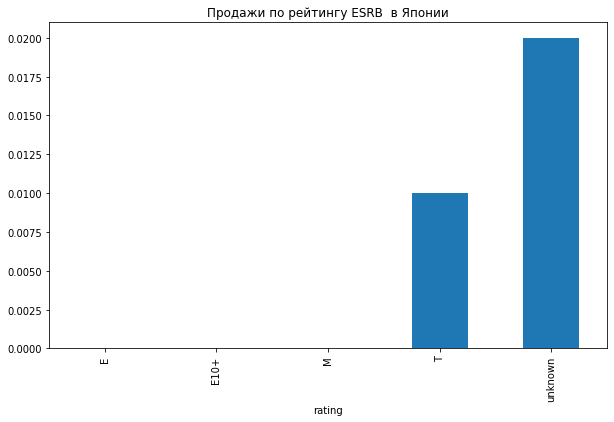

In [112]:
# Посмотрим влияет ли рейтинг ESRB на продажи в Японии:
(df_relevant
.groupby('rating')['jp_sales']
.median()
.sort_values()
.plot(kind = 'bar', 
figsize = (10,6),
title = 'Продажи по рейтингу ESRB  в Японии'));

Лучше всего в Японии продаются игры с неизвестным рейтингом и игры для подростков.

**Вывод**

Вкусы японских пользователей наиболее специфичны. Они любят портативные платформы и японских производителей.

На первом месте здесь `3DS` от `Nintendo`. В пятерке также `PSV` от `PlayStation` и `Wii` от `Nintendo`. А американсих `XBox` вообще нет!

Среди жанров на первом месте - `Role-Playing`. На втором месте непопулярный на других рынках `Puzzle`, на третьем `Fighting`, а на четветом `Adventure`. 

В Японии лучше всего продаются игры с неизвестным рейтингом. 

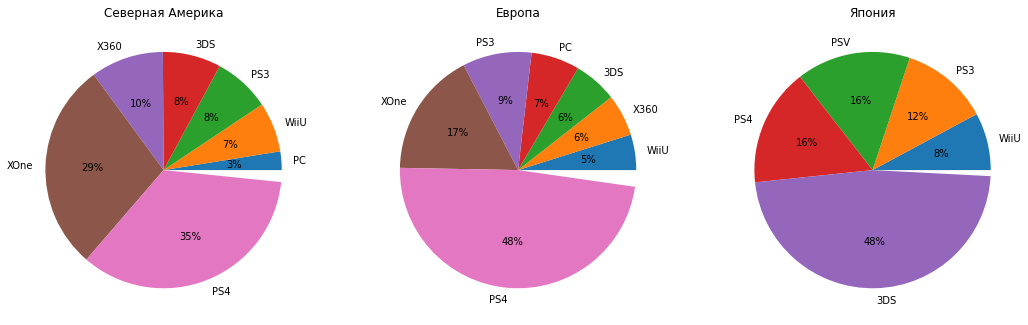

In [113]:
# Посмотрим на графики всех трех регионов:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  

ax1.pie(x = platform_na_sales_relevant.sort_values(by = 'ratio')[platform_na_sales_relevant['per_cent'] > 1]['ratio'], 
       autopct = '%.0f%%',\
       labels = platform_na_sales_relevant[platform_na_sales_relevant['per_cent'] > 1]\
        .sort_values(by = 'ratio')\
        .index,\
        normalize=False)
ax1.set_title('Северная Америка')

ax2.pie(x = platform_eu_sales_relevant.sort_values(by = 'ratio')\
        [platform_eu_sales_relevant['per_cent'] > 1]['ratio'],  
       autopct = '%.0f%%',\
       labels = platform_eu_sales_relevant[platform_eu_sales_relevant['per_cent'] > 1]\
        .sort_values(by = 'ratio')\
        .index,\
       normalize=False)
ax2.set_title('Европа')

ax3.pie(x = platform_jp_sales_relevant.sort_values(by = 'ratio')\
        [platform_jp_sales_relevant['per_cent'] != 0]['ratio'], 
       autopct = '%.0f%%',\
       labels = platform_jp_sales_relevant[platform_jp_sales_relevant['per_cent'] != 0]\
        .sort_values(by = 'ratio')\
        .index,\
       normalize=False)
ax3.set_title('Япония')

plt.show()

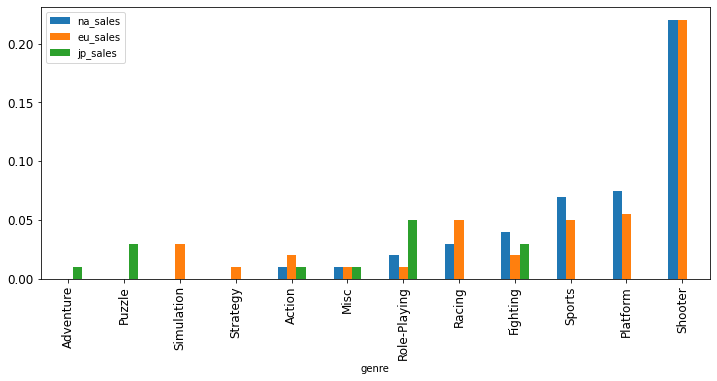

In [114]:
(df_relevant.groupby('genre')['na_sales', 'eu_sales', 'jp_sales']
 .median()
 .sort_values(by = 'na_sales')
 .plot(kind = 'bar', figsize = (12,5), fontsize = 12));


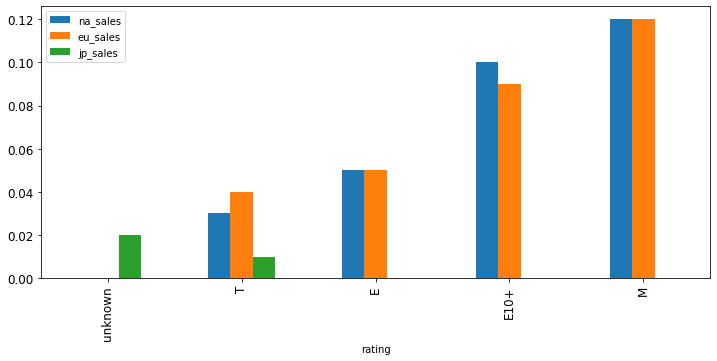

In [115]:
(df_relevant
 .groupby('rating')['na_sales', 'eu_sales', 'jp_sales']
 .median()
 .sort_values(by = 'na_sales')
 .plot(kind = 'bar', figsize = (12,5), fontsize = 12));

**Вывод:**

Итак, вкусы западных пользователей схожи с глобальными и между собой.
Только американцы предпочитают `XBox`, а Европейцы иногда играют на `PC`. 

Американские пользователи больше любят жанр `Platform`, чем `Sports`, и`Role-Playing` вместо `Racing`.
У европейцев в топ-жанров нет `Fighting`, но есть `Simulation`.

На западных пользователей оказывает рейтинг ESRB. Они предпочитают игры "Для всех" c рейтином E ("Everyone"), для взрослых 17+ с рейтингом M ("Mature") и для подростков с рейтингом T ("Teen").
 
У японцев особые предпочтения. Они любят портативные платформы и отечественных производителей.

На первом месте c огромным отрывом здесь `3DS` от `Nintendo`, на третьем месте еще одна портативная приставка  от `PlayStation` - `PSV`, а на пятом `WiiU` от `Nintendo`.
Американские приставки японские пользователи не любят.

Среди жанров в Японии на первом месте - `Role-Playing`. На втором месте непопулярный на других рынках `Puzzle`, на третьем `Fighting`, а на четветом `Adventure`.

В Японии лучше всего продаются игры с неизвестным рейтингом и игры для подростков.нцы и европейцы чуть больше любят `Platform`, чем `Sports`. И предпочитают 


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
# Выведем на экран средние значения
df_relevant[df_relevant['platform'] =='XOne']['user_score'].mean()

In [ ]:
df_relevant[df_relevant['platform'] =='PC']['user_score'].mean()

Формулируем нулевую гипотизу: 

H_0: Пользовательские оценки игр платформы `Xbox One` = Пользовательские оценки игр платформы `PC`

Альтернативная гипотеза: 

H_1: Пользовательские оценки игр платформы `Xbox One` ≠ Пользовательские оценки игр платформы `PC`

In [ ]:
# применяем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
# по взятым из них выборкам:
results1 = st.ttest_ind\
(df_relevant[df_relevant['platform'] =='XOne']['user_score'],\
df_relevant[df_relevant['platform'] =='PC']['user_score'],\
equal_var = False ) # выборки разного размера, поэтому есть сомнения, что дисперсии у совокупностей одинаковые

alpha = .05 # устанвливаем критический уровень статистической значимости в 5%
# если p-value окажется меньше него - отвергнем гипотезу

In [ ]:
results1.pvalue

Таким образом, уровень значимости - вероятность получить наблюдаемое (или еще более далекое от предполагаемого) значение при условии, что нулевая гипотеза верна, оказался меньше выбранного уровня статистической значимости.

Значит, нулевая гипотеза  о том, что пользовательские оценки игр платформы `Xbox One` = пользовательским оценкам игр платформы `PC`отвергается. Оценки пользователями этих платформ разные.

### Средние пользовательские рейтинги жанров Action  и Sports разные

In [ ]:
# Выведем на экран средние значения
df_relevant[df_relevant['genre'] =='Action']['user_score'].mean()

In [ ]:
df_relevant[df_relevant['genre'] =='Sports']['user_score'].mean()

Формулируем нулевую гипотизу:

H_0: Пользовательские оценки игр в жанре `Action` = Пользовательские оценки игр в жанре `Sports`

Альтернативная гипотеза: 

H_1: Пользовательские оценки игр в жанре `Action` ≠ Пользовательские оценки игр в жанре `Sports`

In [ ]:
# применяем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
# по взятым из них выборкам:
results2 = st.ttest_ind\
(df_relevant[df_relevant['genre'] =='Action']['user_score'],\
df_relevant[df_relevant['genre'] =='Sports']['user_score'],\
equal_var = False ) # выборки разного размера, поэтому есть сомнения, что дисперсии у совокупностей одинаковые

alpha = .05 # устанвливаем критический уровень статистической значимости в 5%
# если p-value окажется меньше него - отвергнем гипотезу

In [ ]:
results2.pvalue

Итак, уровень значимости - вероятность получить наблюдаемое (или еще более далекое от предполагаемого) значение  при условии, что нулевая гипотеза верна, оказалась меньше выбранного уровеня статистической значимости. 

Значит, нулевая гипотеза отвергается: пользовательские оценки игр в жанре Action ≠ пользовательским оценкам игр в жанре Sports. Оценки пользователями этих жанров разные.

## Общий вывод

Мы проанализировали исторические данные о международных продажах компьютерных игр интернет-магазина «Стримчик».

**1. Предбработка данных**

На первом этапе мы изучили датасет и подготовили данные к дальнейшему исследованию.

В датасете 16 715 строк и 11 столбцов. Шесть столбцов имели тип данных `float64`, пять столбцов - тип данных `object`. 

Мы привели названия столбцов к нижнему регистру. 

Проанализировали количество и процент пропусков. Пропущенные значения были обнаружены в шести столбцах. В трёх из них доля пропусков не привышала 2%. В столбцах `user_Score` и `rating` были пропущены 40% значений. В столбце `critic_Score` - 51%. Их причиной может быть технический сбой, например, при объединении данных из разных источников, или человеческий фактор.

Пропуски в столбцах с оценками и рейтингом было слишком много, чтобы заменить их на медианы или средние значения, поэтому мы заменили их на нули в `user_score` и `critic_score` и на значение `unknown` в `rating` в соотвествии с типами данных в столбцах.

В столбце `user_score` обнаружили значения tbd ("to be determined(decided)"), заменили их на нули, как и пропуски.

Удалили строки с небольшим количеством пропусков в столбцах `name`, `genre` и `year_of_release`, так как это не повлияет на результаты.

Обработали редкие значения в столбце `rating`.

Изменили типы данных в соответствии с занчениями столбцов `year_of_release` на `int` и `user_score` на `float`.

Подсчитали суммарные продажи во всех регионах и поместили результаты в новый столбец `total_sales`. Категоризировали значения столбца `platform` по семействами/производителям платформ и поместили их в столбец `platform_family`.

**2. Исследовательский анализ** 

На втором этапе мы провели исследовательский анализ данных.

**Количество игр**

С помощью группировки данных и столбчатой диаграммы проанализировали количество игр, выпущеннх в разные годы, и установили, что до начала 90-х игр выпускалось очень мало. Начиная с 1993 года количество выпускаемых игр стало расти. Больше всего игр было выпущено в 2008 и 2009 годах. После 2009 года число ежегодно выпускаемых игр уменьшалось.

**Самые прибыльные платформы**

Также с помощью группировки и столбчатого графика проанализировали исторические данные об общих продажах с разбивкой по платформам. 

Выявили 6 самых прибыльных платформ: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. Суммарно доля продаж на этих платформах составила 63% от общих продаж. Безусловный лидер среди них - `PS2`.

А также самые малоприбыльные платформы: `PCFX`, `3DO`, `TG16`, `WS`, `NG`. Доля продаж на этих платформах составила менее 1% от общих продаж.

**Жизненный цикл платформ**

С помощью сводной таблицы и столбчатых графиков мы проанализировали распределения продаж по годам для каждой из шести самых прибыльных платформ. Мы установили, что жизненный цикл самых прибыльных платформ составляет *10-12 лет*. Новые версии приставок выпускаются каждые *5 - 6 лет*. Пики продаж приходятся на игры, выпущенные *на 4-й - 6-й годы* после появления платформы.

Проанализировав данные столбчатого графика продаж по годам, а также приняв во внимание жизненный цикл платформ, с учетом быстро меняющихся трендов и коротких периодов от появления до пика продаж по платформам, мы определили актуальный период для исследования: *с 2014 по 2016 гг*. При этом для прогнозирования будущих продаж результаты 2016 года не стоит принимать во внимание, так как данные за этот год неполные.

**Потенциально прибыльные платформы**

Определив актуальный период для иссдедования и проанализировав данные о глобальных продажах игр по платформам, мы выявили, что по суммарных продажам лидером являются приставки `PlayStation`. А если судить по медианным продажам - `XBox`.

В актуальном периоде по суммарным продажам с большим отрывом лидирует `PS4`, занимая 40% рынка. Далее идут `XOne`, `3DS`, `PS3` и `X360`.

Однако из графика "ящик с усами" видно, что большие цифры суммарных продаж являются выбросами. 

По медианным продажам `PS4`немного уступает `XOne` А `X360` - на третьем месте.
 
Из графика распределения продаж по годам можно сделать вывод, что `PS4` и `XOne`имеют потенциал дальнейшего роста.

**Оценки критиков и пользователей**

C помощью диаграмм рассеяния и подсчета коэффициента корреляции Пирсона, мы установили, что оценки критиков и пользователей не влияют на продажи самых популярных платформ.

**Жанры**

Проанализировав столбчатую диаграмму, мы выяснили, что лидер по продажам - жанр `Shooter`. Далее следуют `Sports`, `Platform`, `Fighting`  и `Role-Playing`. Меньше всего продается игр в жанрах `Adventure`, `Puzzle,` и `Strategy`.

**Портреты пользвателей разных регионов**

Проанализировав с помощью группировки данных, столбчатых и круговых диаграмм влияние различных параметров на продажи в регионах, мы составили портреты пользвателей.

*Северная Америка*

Портрет североамериканского пользователя в целом мало чем отличается от портрета глобального пользователя.

Американцы предпочитают те почти те же жанры и те же платформы. 

`PS4` также лидирует занимая 35% рынка. Далее идет `XOne` с 29%. Если в мире на третьем месте `3DS`, то в Северной Америке - `X360` производства американской компании `Microsoft`.

Как и в мире, в Америке лидирует жанр `Shooter`. Но в отличие от глобальных пользователей американцы больше любят жанр `Platform`, чем `Sports`. `Fighting` - на четвертом, а вместо `Role-Playing` - `Racing`.

Значительное влияние на предпочтения американских пользователей оказывает рейтинг ESRB. Американцы предпочитают игры "Для всех" c рейтином E ("Everyone"), для взрослых 17+ с рейтингом M ("Mature") и для подростков с рейтингом T ("Teen").
 
*Европа*

В целом предпочтения европейцев схожи с американскими. Безусловный лидер и здесь `PS4`, занимающая 48% рынка. `PS3` - на третьем месте, `3DS` - на пятом. Отличия в том, что `X360` не входит в топ-5, на четвертом месте в Европе `PC`. 

В плане рейтингов и жанров европейские предпочтения почти не отлтчимы от американских, за исключением того, что в топ-жанров нет `Fighting`, но есть `Simulation`.

*Япония*

Предпочтения японских пользователей сильно отличаются от глобальных и западных. Они любят портативные платформы и отечественных производителей.

На первом месте c огромным отрывом здесь `3DS` от `Nintendo`, которая в мире занимает лишь третье, в Америке - четвертое, а в Европе пятое место. На третьем месте еще одна портативная приставка на этот раз от `PlayStation` - `PSV`, а на пятом `WiiU` которых нет в топе на других рынках.

`PS2` и `PS3` на втором и четвертом соответственно.

А приставок американской `XBox` в Японии практически нет.

Среди жанров в Японии на первом месте - `Role-Playing`. На втором месте непопулярный на других рынках `Puzzle`, на третьем `Fighting`, а на четветом `Adventure`.

В Японии лучше всего продаются игры с неизвестным рейтингом и игры для подростков.

**3. Проверка гипотез**

В ходе исследования с помощью метода `scipy.stats.ttest_ind` мы проверили две гипотезы:

- Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковыe 

  Для проверки первого предположения нулевая гипотиза была сформулированя cледующим образом:
  "Пользовательские оценки игр платформы `Xbox One` = Пользовательские оценки игр платформы `PC`".
    
  А альтернативная гипотеза:
  "Пользовательские оценки игр платформы `box One` ≠ Пользовательские оценки игр платформы `PC`".
  
  Критический уровень статистической значимости `alpha` мы установили на 5%.
    
  T-тест показал, что показатель вероятности получить наблюдаемое (или еще более далекое) значение при условии, что нулевая гипотеза верна - `p-value` - оказался меньше выбранного уровня статистической значимости.
    
  Таким образом нулевая гипотеза о том, что пользовательские оценки игр платформы `Xbox One` = пользовательским оценкам игр платформы `PC` *отвергнута*. Оценки пользователями этих платформ разные.
  

- Средние пользовательские рейтинги жанров `Action` и `Sports` разные
  
  Для проверки второго предположения нулевая гипотиза была сформулированя cледующим образом:
  "Пользовательские оценки игр в жанре `Action` = Пользовательские оценки игр в жанре `Sports`
  Альтернативная гипотеза:
  "Пользовательские оценки игр в жанре `Action` ≠ Пользовательские оценки игр в жанре `Sports`"
  
  И здесь мы установили критический уровень статистической значимости `alpha` на 5%.
  
  И здесь `p-value` оказался меньше выбранного уровеня статистической значимости.
  
  Нулевая гипотеза о равенстве средних оценок жанров `Action` и `Sports`была *отвергнута*. А предоложение о том, что оценки пользователями этих жанров разные подтвердилось.

**Заключение**

 В ходе исследования мы выявили, что на успешность игры влияют: 
 - год выпуска
 - платформа
 - жанр
 - регион продаж
 - возрастной рейтинг 
 
В ближайшем будущем на глобальном и западных рынках стоит сделать ставку на игры для платформ `XOne` и `PS4` в жанре`Shooter`. 
 
Для японского рынка, следует отдать предпочтение жанру `Role-Playing` и играм для портативных платформ.